In [25]:
import numpy as np
import pandas as pd
# Ignoring the Harmless Warnings
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from pmdarima import auto_arima

### <font color = red> <b> Importing Data Containint CO2 Level in Hawai

In [5]:
hawaii = pd.read_csv("Data/co2_mm_mlo.csv")

In [6]:
hawaii.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
# Creating A time Stamp Data Column out of year and Month Column

hawaii['Date'] = pd.to_datetime({'year': hawaii['year'], 'month': hawaii['month'], 'day':1})

In [9]:
hawaii.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [10]:
hawaii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   Date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [18]:
hawaii.set_index('Date', inplace=True)


In [19]:
hawaii.index.freq = 'MS'

In [20]:
hawaii.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


<font color = blue> <b> Plotting the Interpolated column

<AxesSubplot:xlabel='Date'>

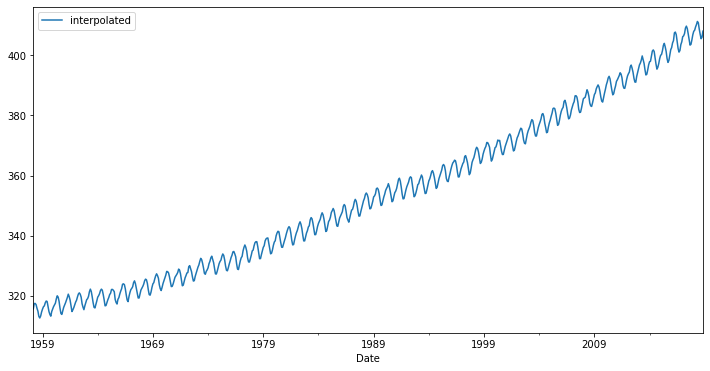

In [21]:
hawaii['interpolated'].plot(figsize=(12,6), legend=True)

<font color = blue> <b> Apply Seasonal Decomposition To see the Seasonality in The Data

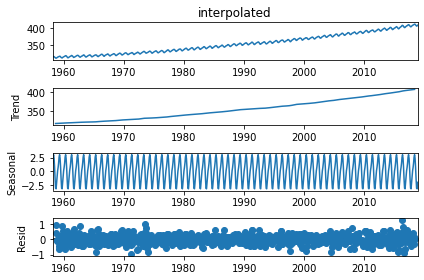

In [33]:
result =  seasonal_decompose(hawaii['interpolated'], model='add')

result.plot();

<AxesSubplot:xlabel='Date'>

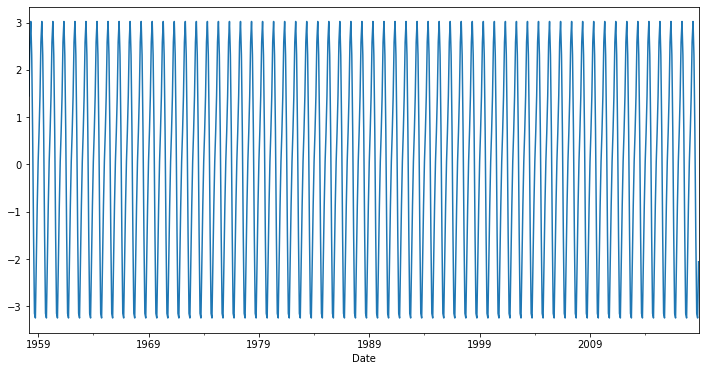

In [30]:
# Checking the seasonality Period

result.seasonal.plot(figsize=(12,6))

<font color = green> <b> Seasonality is repeating every 12 months i.e. 1 year

<font color = blue> <b> Running the Auto Arima

In [35]:
auto_arima(hawaii['interpolated'], seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=458.371, Time=4.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2369.532, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1614.808, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2375.248, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1101.954, Time=3.99 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=770.624, Time=3.74 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=501.138, Time=9.82 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=538.381, Time=10.62 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1440.918, Time=0.89 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=10.88 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=611.731, Time=11.44 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=14.50 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=451.828, Time=4.53 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.701
Date:                              Mon, 18 Jan 2021   AIC                            423.401
Time:                                      22:34:47   BIC                            450.943
Sample:                                           0   HQIC                           434.028
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3560      0.035    -10.073      0.000      -0.425      -0.287
ma.L2         -0.0224      0.028     -0.792      0.428      -0.078       0.033
ma.L3         -0.0861      0.028     -3.042      0.002      -0.142      -0.031
ar.S.L12       0.9996      0.000   2870.137      0.000       0.999       1.000
ma.S.L12      -0.8653      0.021    -40.475      0.000      -0.907      -0.823
sigma2         0.0956      0.005     20.324      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.99
Prob(Q):                              0.79   Prob(JB):                         0.14
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color = green> <b> From the above Auto ARIMA model we got thefollowing value: p=0, d=1, q=3, P=1, D=0, Q=1, m=12

<font color = blue> <b> Train-Test Split 

In [36]:
len(hawaii)

729

In [37]:
train = hawaii.iloc[:717]
test = hawaii.iloc[717:]

<font color = blue> <b> Training the model and Predicting for the test Data

In [38]:
model = SARIMAX(train['interpolated'], order=(0,1,3), seasonal_order=(1,0,1,12))

In [39]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.189
Date:                              Mon, 18 Jan 2021   AIC                            414.378
Time:                                      22:49:21   BIC                            441.820
Sample:                                  03-01-1958   HQIC                           424.975
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3536      0.036     -9.920      0.000      -0.423      -0.284
ma.L2         -0.0240      0.037     -0.649      0.516      -0.096       0.048
ma.L3         -0.0876      0.030     -2.965      0.003      -0.146      -0.030
ar.S.L12       0.9996      0.000   3076.618      0.000       0.999       1.000
ma.S.L12      -0.8669      0.022    -38.555      0.000      -0.911      -0.823
sigma2         0.0950      0.005     20.287      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.77   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
# Predicting for the Test Data
start = len(train)
end = len(train) + len(test) - 1


In [41]:
predictions = results.predict(start,end,typ='levels').rename("SARIMA Predictions")

<AxesSubplot:xlabel='Date'>

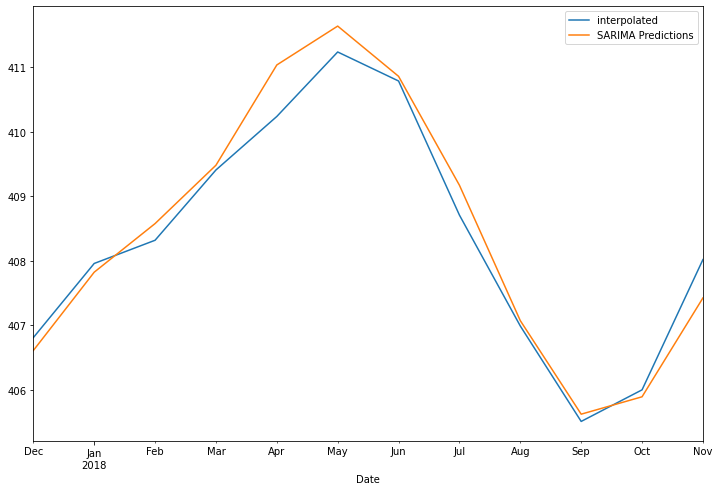

In [42]:
# Plotting actual VS Predicted Values

test['interpolated'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)

In [49]:
test['interpolated'].mean()

408.3333333333333

In [46]:
# Evaluating the Model

from statsmodels.tools.eval_measures import rmse, rmspe

In [47]:
error = rmse(test['interpolated'], predictions)
error1= rmspe(test['interpolated'], predictions)

In [48]:
print(error)
print(error1)

0.3576366587203376
0.00873720451738255


### <font color = red> Focasting the Future

In [50]:
model1 = SARIMAX(hawaii['interpolated'], order=(0,1,3), seasonal_order=(1,0,1,12))
results1 = model1.fit()

In [53]:
fcast = results1.predict(len(hawaii), len(hawaii)+24, typ='level').rename("SARIMA Forecast Values")

<AxesSubplot:xlabel='Date'>

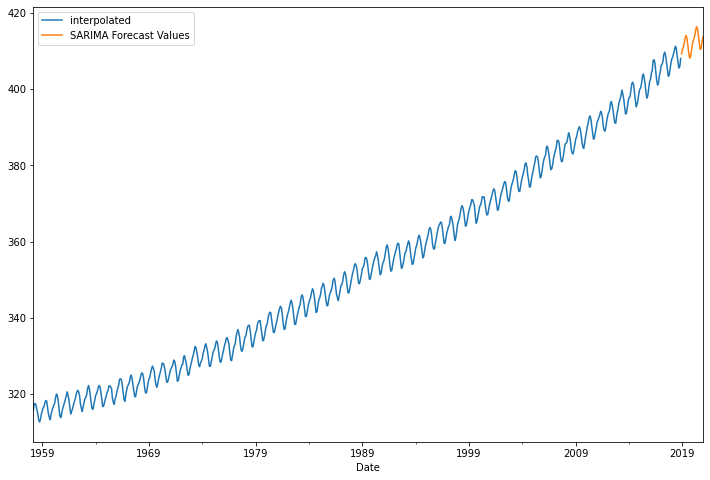

In [54]:
# Plotting actual VS Forecasted Values

hawaii['interpolated'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)